In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import sklearn

Data Dictionary  
| **Variable** | **Definition**                       | **Key**                            |
|--------------|--------------------------------------|------------------------------------|
| survival     | Survival                             | 0 = No, 1 = Yes                    |
| pclass       | Ticket class                         | 1 = 1st, 2 = 2nd, 3 = 3rd          |
| sex          | Sex                                  |                                    |
| Age          | Age in years                         |                                    |
| sibsp        | # of siblings / spouses aboard the Titanic |                                |
| parch        | # of parents / children aboard the Titanic |                              |
| ticket       | Ticket number                        |                                    |
| fare         | Passenger fare                       |                                    |
| cabin        | Cabin number                         |                                    |
| embarked     | Port of Embarkation                  | C = Cherbourg, Q = Queenstown, S = Soa nanny, therefore parch=0 for them.

Variable Notes  
pclass: A proxy for socio-economic status (SES)  
1st = Upper  
2nd = Middle  
3rd = Lower  
age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5  
sibsp: The dataset defines family relations in this way...  
Sibling = brother, sister, stepbrother, stepsister  
Spouse = husband, wife (mistresses and fiancés were ignored)  
parch: The dataset defines family relations in this way...  
Parent = mother, father  
Child = daughter, son, stepdaughter, stepson  
Some children travelled only with a nanny, therefore parch=0 for them.  

# Overview

In [4]:
test = pd.read_csv("/kaggle/input/titanic/test.csv")
train = pd.read_csv("/kaggle/input/titanic/train.csv")

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: >

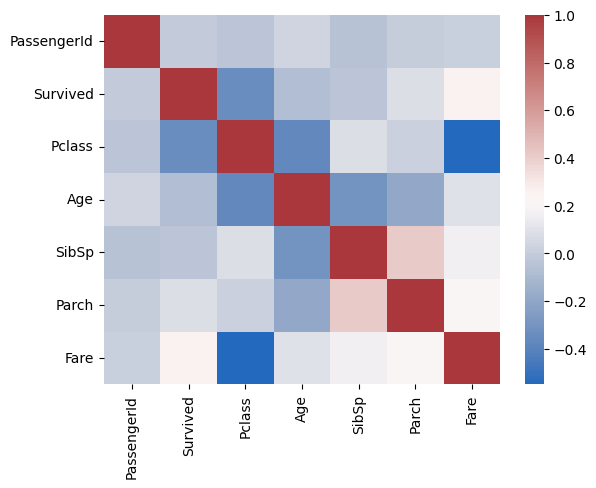

In [8]:
sns.heatmap(train.drop(columns=['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']).corr(), cmap="vlag")

# Exploring Variables

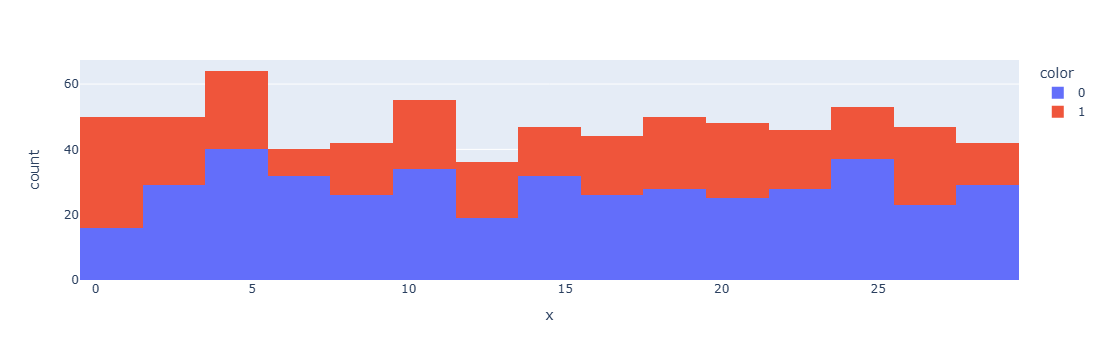

-0.04823376320925355

In [40]:
numbins = 30

age_cut = pd.qcut(train.Age, numbins, labels=range(numbins), retbins=True)
px.histogram(x = age_cut[0], color = train.Survived).show()
train.Survived.corr(age_cut[0])

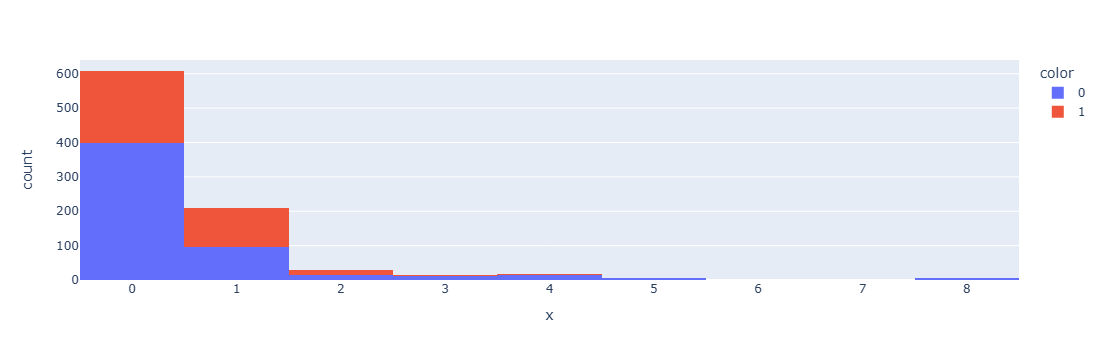

In [41]:
px.histogram(x = train.SibSp, color = train.Survived).show()

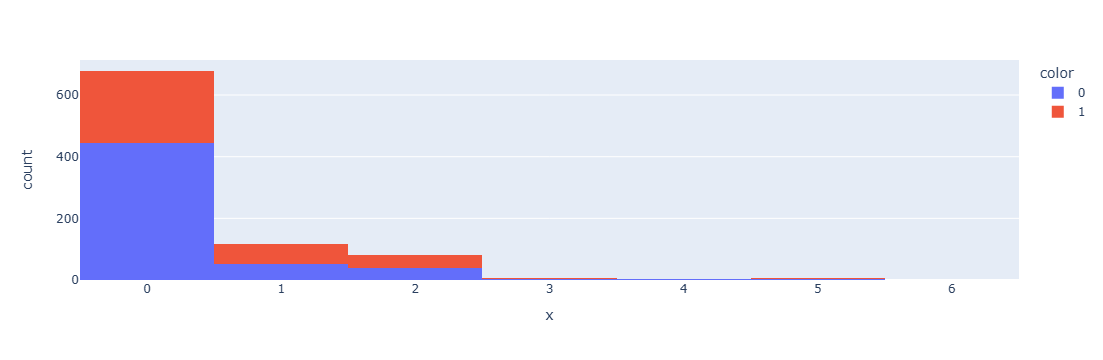

In [42]:
px.histogram(x = train.Parch, color = train.Survived).show()

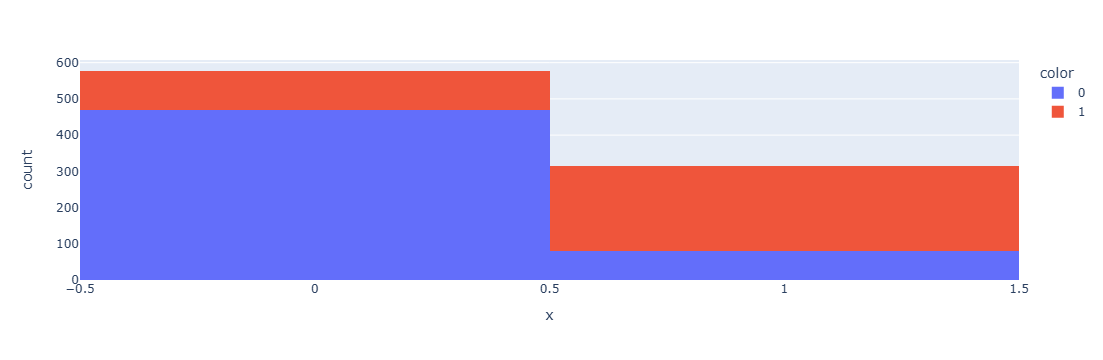

In [49]:
px.histogram(
    x = train.Sex.dropna().replace(
        ['male', 'female'], [0, 1]
    ), 
    color = train.Survived
).show()

# Data Processing

## Test Train Split

In [10]:
# Train/test split
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
def set_train_data():


    splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2)
    for train_indeces, test_indeces in splitter.split(train, train[['Survived', 'Pclass', 'Sex']]):
        strat_train_set = train.loc[train_indeces]
        strat_test_set = train.loc[test_indeces]
    
    return [strat_train_set, strat_test_set]

In [11]:
split_results = set_train_data()

### Verifying Stratified Split

In [13]:
px.histogram(x = split_results[0]["Survived"]).show()
px.histogram(x = split_results[1]["Survived"]).show()

In [16]:
px.histogram(split_results[-2]["Pclass"]).show()
px.histogram(split_results[-1]["Pclass"]).show()

In [14]:
px.histogram(split_results[-2]["Sex"]).show()
px.histogram(split_results[-1]["Sex"]).show()

### Data Integrity

In [17]:
split_results[-2].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
70,71,0,2,"Jenkin, Mr. Stephen Curnow",male,32.0,0,0,C.A. 33111,10.5000,NaN,S
56,57,1,2,"Rugg, Miss. Emily",female,21.0,0,0,C.A. 31026,10.5000,NaN,S
860,861,0,3,"Hansen, Mr. Claus Peter",male,41.0,2,0,350026,14.1083,NaN,S
315,316,1,3,"Nilsson, Miss. Helmina Josefina",female,26.0,0,0,347470,7.8542,NaN,S
673,674,1,2,"Wilhelms, Mr. Charles",male,31.0,0,0,244270,13.0000,NaN,S


In [18]:
split_results[-2].info()

<class 'pandas.core.frame.DataFrame'>

Index: 712 entries, 70 to 73

Data columns (total 12 columns):

 #   Column       Non-Null Count  Dtype  

---  ------       --------------  -----  

 0   PassengerId  712 non-null    int64  

 1   Survived     712 non-null    int64  

 2   Pclass       712 non-null    int64  

 3   Name         712 non-null    object 

 4   Sex          712 non-null    object 

 5   Age          567 non-null    float64

 6   SibSp        712 non-null    int64  

 7   Parch        712 non-null    int64  

 8   Ticket       712 non-null    object 

 9   Fare         712 non-null    float64

 10  Cabin        159 non-null    object 

 11  Embarked     711 non-null    object 

dtypes: float64(2), int64(5), object(5)

memory usage: 72.3+ KB


## Assembling Pipeline

In [17]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.compose import make_column_selector as selector

def prepare_X_data(X):
    # Drop irrelevant columns
    X = X.drop(columns=['Cabin', 'Name', 'Ticket'])
    
    # Select numerical and categorical columns
    numerical_columns_selector = selector(dtype_exclude=object)
    categorical_columns_selector = selector(dtype_include=object)
    
    numerical_columns = numerical_columns_selector(X)
    categorical_columns = categorical_columns_selector(X)

    # Define preprocessors for categorical and numerical data
    categorical_preprocessor = OneHotEncoder(handle_unknown='ignore')
    mean_imputer = SimpleImputer(strategy="mean")
    cat_imputer = SimpleImputer(strategy="most_frequent")
    X[['Sex', 'Embarked']] = cat_imputer.fit_transform(X[['Sex', 'Embarked']])
    
    # Combine preprocessors into a ColumnTransformer
    preprocessor = ColumnTransformer(
        transformers=[
            ("categorical_preprocessor", categorical_preprocessor, categorical_columns),
            ("numerical_imputer", mean_imputer, numerical_columns)
        ],
        remainder="passthrough",
    )

    # Transform the data
    X_transformed = preprocessor.fit_transform(X)

    return X_transformed

In [19]:
X_train, y_train = split_results[0].drop(columns=['Survived']), split_results[0]['Survived']
X_train_transformed = prepare_X_data(X_train)
pd.DataFrame(X_train_transformed)

,0,1,2,3,4,5,6,7,8,9,10
0,0.0,1.0,1.0,0.0,0.0,523.0,3.0,29.870543,0.0,0.0,7.2250
1,0.0,1.0,0.0,0.0,1.0,250.0,2.0,54.000000,1.0,0.0,26.0000
2,0.0,1.0,0.0,0.0,1.0,669.0,3.0,43.000000,0.0,0.0,8.0500
3,0.0,1.0,0.0,0.0,1.0,644.0,3.0,29.870543,0.0,0.0,56.4958
4,1.0,0.0,0.0,0.0,1.0,54.0,2.0,29.000000,1.0,0.0,26.0000
...,...,...,...,...,...,...,...,...,...,...,...
707,1.0,0.0,1.0,0.0,0.0,312.0,1.0,18.000000,2.0,2.0,262.3750
708,0.0,1.0,0.0,0.0,1.0,93.0,1.0,46.000000,1.0,0.0,61.1750
709,0.0,1.0,0.0,0.0,1.0,287.0,3.0,30.000000,0.0,0.0,9.5000
710,0.0,1.0,0.0,0.0,1.0,220.0,2.0,30.000000,0.0,0.0,10.5000


# Modeling

## Model Selection

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
# new_model = make_pipeline(preprocessor, RandomForestClassifier())
parameters = {
    'n_estimators': [10, 100, 200, 500],
    "max_depth": [None, 5, 10],
    "min_samples_split": [2, 3, 4]
}
cv_search = GridSearchCV(
    RandomForestClassifier(), 
    parameters,
    cv = 3,
    scoring = "accuracy",
    return_train_score=True
)
cv_search.fit(X_train_transformed, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [10, 100, 200, 500]},
             return_train_score=True, scoring='accuracy')

In [21]:
cv_search.best_estimator_

RandomForestClassifier(min_samples_split=3, n_estimators=200)

In [24]:
strat_test = split_results[-1]
X_test, y_test = strat_test.drop(columns=['Survived']), strat_test['Survived']
best_RFC = cv_search.best_estimator_
best_RFC.score(
    prepare_X_data(X_test),
    y_test
)

0.8324022346368715

## Building Final Model

### CV On Entire Dataset

In [25]:
parameters = {
    'n_estimators': [10, 100, 200, 500],
    "max_depth": [None, 5, 10],
    "min_samples_split": [2, 3, 4]
}
final_cv_search = GridSearchCV(
    RandomForestClassifier(), 
    parameters,
    cv = 3,
    scoring = "accuracy",
    return_train_score=True
)
final_cv_search.fit(
    prepare_X_data(train.drop(columns=['Survived'])),
    train['Survived']
)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [10, 100, 200, 500]},
             return_train_score=True, scoring='accuracy')

In [26]:
final_cv_search.cv_results_

{'mean_fit_time': array([0.0318137 , 0.28805057, 0.57412624, 1.41047621, 0.02954825,
        0.28318636, 0.57647832, 1.38921841, 0.02893003, 0.27174926,
        0.56172085, 1.37880532, 0.02681168, 0.26006762, 0.51330137,
        1.27510214, 0.02827533, 0.2560366 , 0.51350451, 1.27390202,
        0.02809413, 0.25841951, 0.52940838, 1.30641286, 0.02934329,
        0.27180632, 0.54946462, 1.36498094, 0.02852313, 0.27387691,
        0.55327702, 1.37344853, 0.0293053 , 0.2751685 , 0.54367073,
        1.34756112]),
 'std_fit_time': array([1.10068177e-03, 4.52247341e-03, 3.60862572e-03, 2.09306817e-02,
        5.68595216e-04, 5.18915214e-03, 1.07187494e-02, 1.20148749e-02,
        3.70541865e-04, 3.63767024e-03, 5.07616338e-03, 1.25586177e-02,
        2.23841937e-04, 1.90977786e-03, 4.24686380e-04, 1.66094798e-02,
        6.21680741e-04, 2.25324892e-03, 6.03224825e-04, 1.25349416e-02,
        8.40521819e-04, 1.31802341e-03, 8.79641964e-03, 3.18160254e-02,
        5.12554046e-04, 3.01376919e-0

In [27]:
final_cv_search.best_estimator_

RandomForestClassifier(max_depth=5, min_samples_split=3, n_estimators=200)

In [29]:
final_prediction = pd.concat(
    [
        test['PassengerId'],
        pd.Series(best_RFC.predict(prepare_X_data(test)))
    ], axis=1
)
final_prediction.columns = ['PassengerId', 'Survived']
final_prediction

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [28]:
best_final_RFC = cv_search.best_estimator_
best_final_RFC.score(
    prepare_X_data(train.drop(columns=['Survived'])),
    train[['Survived']]
)

0.9618406285072951

# Final Prediction

In [30]:
final_prediction_CV = pd.concat(
    [
        test['PassengerId'],
        pd.Series(best_final_RFC.predict(prepare_X_data(test)))
    ], axis=1
)
final_prediction_CV.columns = ['PassengerId', 'Survived']
final_prediction_CV
final_prediction_CV.to_csv("/kaggle/working/jul24cv_sub.csv", index=False)

In [ ]:
final_prediction_CV